In [2]:
using LinearAlgebra, CSV, Plots

In [4]:
data = CSV.read("DEFRA_Data.csv")

,Column1,England,Wales,Scotland,Northern Ireland
,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,Cheese,105,103,103,66
2,Carcass meat,245,227,242,267
3,Other meat,685,803,750,586
4,Fish,147,160,122,93
5,Fats and oils,193,235,184,209
6,Sugars,156,175,147,139
7,Fresh potatoes,720,874,566,1033
8,Fresh Veg,253,265,171,143
9,Other veg,488,570,418,355


In [5]:
# Make Data Matrix: A0
A_0 = zeros(17, 4)
A_0[:,1] = copy(data[:, 2])
A_0[:,2] = copy(data[:, 3])
A_0[:,3] = copy(data[:, 4])
A_0[:,4] = copy(data[:, 5])
A_0

17×4 Array{Float64,2}:
  105.0   103.0   103.0    66.0
  245.0   227.0   242.0   267.0
  685.0   803.0   750.0   586.0
  147.0   160.0   122.0    93.0
  193.0   235.0   184.0   209.0
  156.0   175.0   147.0   139.0
  720.0   874.0   566.0  1033.0
  253.0   265.0   171.0   143.0
  488.0   570.0   418.0   355.0
  198.0   203.0   220.0   187.0
  360.0   365.0   337.0   334.0
 1102.0  1137.0   957.0   674.0
 1472.0  1582.0  1462.0  1494.0
   57.0    73.0    53.0    47.0
 1374.0  1256.0  1572.0  1506.0
  375.0   475.0   458.0   135.0
   54.0    64.0    62.0    41.0

In [6]:
# Center the data in A_0. This forms the matrix A
A = copy(A_0)
for i = 1:17
    
    # Calculate the mean of the i-th row
    μ = sum(A_0[i, :])/4
    
    # Subtract the mean from each entry in the i-th row
    A[i,1] -= μ
    A[i,2] -= μ
    A[i,3] -= μ
    A[i,4] -= μ
end

# Form the sample covariance matrix S
S = A*A'/(3)

17×17 Array{Float64,2}:
   355.583    -268.417   1466.0    …   -1009.67     2793.75    174.917 
  -268.417     272.25   -1506.0         1460.33    -2438.25   -163.75  
  1466.0     -1506.0     8728.67       -6191.33    14050.7     960.667 
   473.5      -443.5     2213.67       -3371.33     3748.17    238.167 
   -54.4167   -129.75     586.0        -2407.67      103.75     26.25  
   189.25     -229.083   1162.33   …   -1965.67     1711.08    115.917 
 -2947.42     1499.25   -9799.33       -7979.0    -22680.6   -1384.08  
   831.667    -781.667   3585.33       -7544.0      6076.33    373.0   
  1287.42    -1387.25    6944.67      -11559.7     10861.9     713.417 
   182.333    -134.0      924.333        488.667    1731.33    116.333 
   192.333    -194.0      864.333  …   -2081.33     1401.33     86.3333
  3709.5     -3158.83   16125.0       -20274.0     28839.5    1808.83  
    84.5      -498.833   2530.0        -6174.0      2209.5     193.833 
   129.167    -165.5      858.667      -

In [10]:
U, Σ, V = svd(A)

SVD{Float64,Float64,Array{Float64,2}}([-0.0569554 -0.0160129 0.0239429 -0.368186; 0.0479276 -0.0139158 0.0636711 -0.62125; … ; -0.463968 -0.113537 -0.498583 0.310074; -0.0296502 -0.00594992 -0.0523216 -0.000728346], [561.445, 368.49, 127.957, 3.47505e-14], [-0.25825 -0.428411 -0.16363 0.850292; 0.006874 0.609642 -0.776362 0.159847; 0.826595 -0.441362 -0.347112 -0.0381213; -0.5 -0.5 -0.5 -0.5])

In [ ]:
foods = 

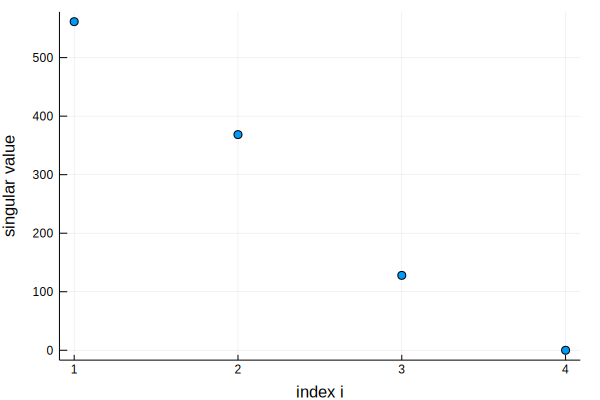

In [11]:
scatter(Σ, legend = false, xaxis = "index i", yaxis = "singular value")

In [ ]:
x1 = (U[:,1]'A[:,1])/(U[:,1]'*U[:,1])
x2 = (U[:,1]'A[:,1])/(U[:,1]'*U[:,1])
x3 = (U[:,1]'A[:,1])/(U[:,1]'*U[:,1])
x4 = (U[:,1]'A[:,1])/(U[:,1]'*U[:,1])

y1 = (U[:,1]'A[:,1])/(U[:,1]'*U[:,1])
y2 = (U[:,1]'A[:,1])/(U[:,1]'*U[:,1])
y3 = (U[:,1]'A[:,1])/(U[:,1]'*U[:,1])
y4 = (U[:,1]'A[:,1])/(U[:,1]'*U[:,1])

In [ ]:
countries = 
series_annotations = text.([x for x in countries], )

In [ ]:
scatter([(x1, y1), (x2,y2), (x3,y3), (x4,y4)], series_annotations = text.([x for x in countries], :bottom) legend = false)

In [ ]:
x, y = U[]